<a href="https://colab.research.google.com/github/augustolnb/IA-projects/blob/main/house_value_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import warnings

# área construida [feature]
x = np.array([40, 45, 50, 55, 60, 70, 80, 86, 90, 100, 110, 111, 120, 132, 140, 149, 160, 171, 180, 191]).reshape(-1,1)
# valor do mercado das casas [variável]
y = np.array([51000, 62000, 70100, 75245, 82200, 91200, 101000, 110200, 120000, 130000, 150000, 170000, 180000, 190000, 200000, 205000, 210000, 220000, 235000, 250000]).reshape(-1, 1)


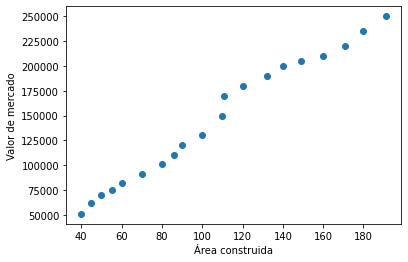

In [2]:
# Visualizando os dados iniciais

plt.scatter(x,y)
plt.xlabel("Área construida")
plt.ylabel("Valor de mercado")
plt.show()

In [3]:
# Pré processamento dos dados

from sklearn.preprocessing import StandardScaler

# verificação de média e desvio padrão antes da normalização
print("Média de X: {:.1f}\nDesvio padrão de X: {:.1f}".format(np.mean(x), np.std(x)))

# fazendo a normalização dos dados
ss = StandardScaler()
x = ss.fit_transform(x)
y = ss.fit_transform(y)
# Fórmula usada na implementação do método fit_transform()
#
# x = x - (x.mean())
#    ----------------
#        x.std()

# verificação de média e desvio padrão pós normalização
print("Média de X: {:.1f}\nDesvio padrão de X: {:.1f}".format(np.mean(x), np.std(x)))



Média de X: 107.0
Desvio padrão de X: 46.0
Média de X: 0.0
Desvio padrão de X: 1.0


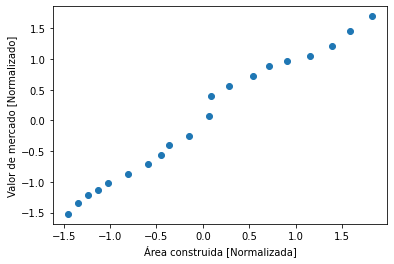

In [4]:
# Visualizando os dados normalizados

plt.scatter(x,y)
plt.xlabel("Área construida [Normalizada]")
plt.ylabel("Valor de mercado [Normalizado]")
plt.show()

In [5]:
# Separando os conjuntos de dados - treinamento e teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=25)

In [ ]:
# Definindo o modelo da rede

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential([
    Dense(units=1, input_shape=(1,), activation='relu'), 
    Dense(units=3, input_shape=(1,), activation='relu'),
    Dense(units=1)
    ])
#model.summary()

model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', )
model.fit(x=x_treino, y=y_treino, epochs=20, validation_data=(x_teste, y_teste))

1/1 [==============================] - 0s 51ms/step


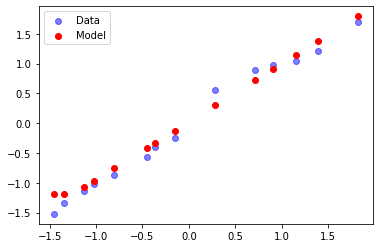

In [21]:
# visualiza predições

def checa_predicoes(model, x, y):
    y_pred = model.predict(x)
    plt.scatter(x, y, c='b', alpha=0.5, label="Data")
    plt.scatter(x, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    
checa_predicoes(model, x_treino, y_treino)